In [1]:
from maelzel.core import *
cfg = getConfig()


In [3]:
struct = ScoreStruct(r'''
3/16, 4=100
2/16
3/16
4/16
2/16
3/16
5/16(2-2-1)
4/16
5/16(2-2-1)
6/16(2-2-2)
4/16, barline=double
2/16
4/16
3/16
7/16(2-2-2-1)
2/16
4/16
.
5/16(2-2-1)
4/16
8/16
4/16, barline=double
3/16
2/16
5/16(2-2-1)
6/16
4/16
3/16
4/16
5/16
3/16
6/16
3/16, barline=double
6/16
3/16
4/16
5/16
2/16
3/16
4/16
5/16
8/16
4/16
6/16, barline=double
2/16
3/16
5/16
4/16
3/16
2/16
5/16
2/16
3/16
6/16
2/16, barline=double
3/16
.
.
.
2/16
3/16
4/16
5/16
4/16
8/16
2/16
3/16
4/16
3/16
.
.
4/16
4/16, barline=final
''')
struct.activate()


Meas. Index,Timesig,Tempo (quarter note),Label,Rehearsal,Barline,Beats
0,3/16,100,,,,3/4
1,2/16,,,,,1/2
2,3/16,,,,,3/4
3,4/16,,,,,1/2+1/2
4,2/16,,,,,1/2
5,3/16,,,,,3/4
6,5/16(2-2-1),,,,,1/2+1/2+1/4
7,4/16,,,,,1/2+1/2
8,5/16(2-2-1),,,,,1/2+1/2+1/4
9,6/16(2-2-2),,,,,1/2+1/2+1/2


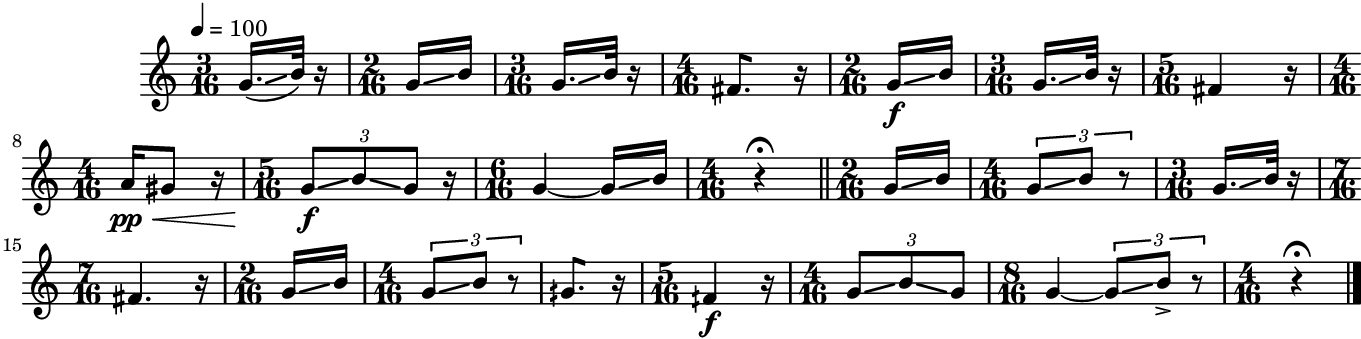

In [4]:

ch = Chain([
    Note("4G:3/8:gliss").addSpanner('slur'), Note("4B/32").addSpanner('~slur'), "R/16",
    "4G/16:gliss", "4B/16",
    "4G:.375:gliss", "4B/32", "R/16",
    "4F#/8.", "R/16",
    
    "4G/16:gliss:f", "4B/16",
    "4G:.375:gliss", "4B/32", "R/16",
    "4F#/4", "R/16",
    
    Note("4A/16:pp").addSpanner('<'), "4G#/8", "R/16",
    "4G:1/3:f:gliss", "4B:1/3:gliss", "4G:1/3", "R/16",
    "4G~:1", "4G/16:gliss", "4B/16",
    
    Rest(1).addSymbol(symbols.Fermata()),
    
    "4G/16:gliss", "4B/16",
    "4G:1/3:gliss", "4B:1/3", "r:1/3",
    "4G:.375:gliss", "4B/32", "R/16",
    "4F#:1.5", "r/16",
    
    "4G/16:gliss", "4B/16",
    "4G:1/3:gliss", "4B:1/3", "r:1/3",
    
    "4G+:3/4", "r/16",
    Note("4F+:1", dynamic="f"), 
    "r/16",
    
    "4G:1/3:gliss", "4B:1/3:gliss", "4G:1/3",
    "4G~:1", "4G:1/3:gliss", "4B:1/3:articulation=accent", "r:1/3",
    
    Rest(1).addSymbol('fermata'),

])
ch.show()


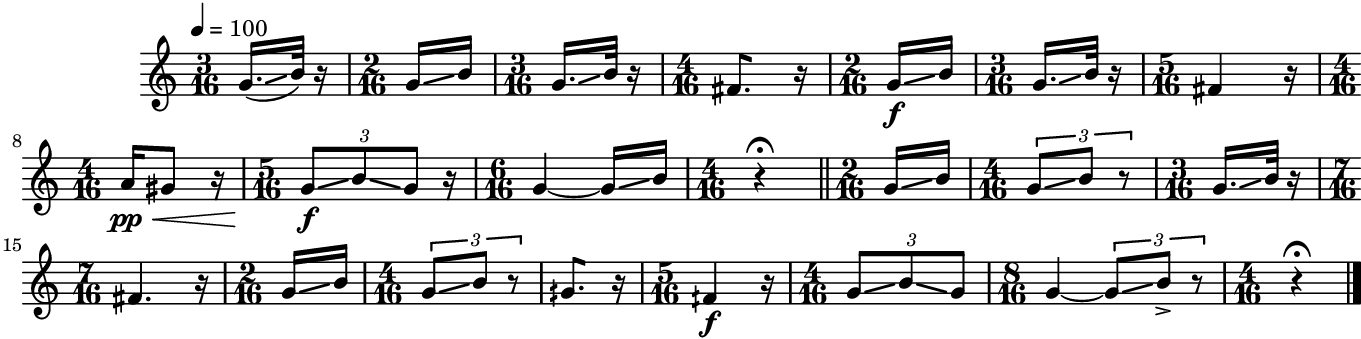

In [6]:
q = ch.quantizedScore()
sc = q.coreScore()
sc.show()

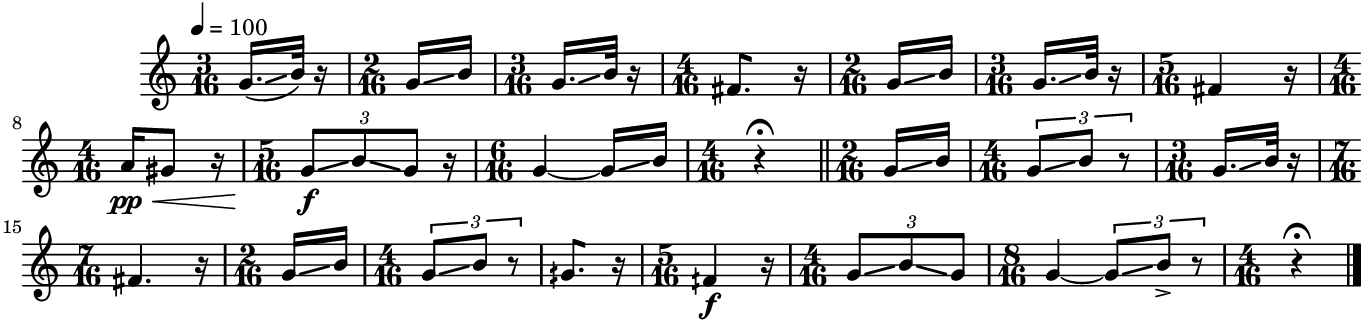

In [7]:
ch = Chain([
    Note("4G:3/8:gliss").addSpanner('slur'), Note("4B/32").addSpanner('~slur'), "R/16",
    "4G/16:gliss", "4B/16",
    "4G:.375:gliss", "4B/32", "R/16",
    "4F#/8.", "R/16",
    
    "4G/16:gliss", "4B/16",
    "4G:.375:gliss", "4B/32", "R/16",
    "4F#/4", "R/16",
    
    Note("4A/16:pp").addSpanner('<'), "4G#/8", "R/16",
    "4G:1/3:f:gliss", "4B:1/3:gliss", "4G:1/3", "R/16",
    "4G~:1", "4G/16:gliss", "4B/16",
    
    Rest(1).addSymbol(symbols.Fermata()),
    
    "4G/16:gliss", "4B/16",
    "4G:1/3:gliss", "4B:1/3", "r:1/3",
    "4G:.375:gliss", "4B/32", "R/16",
    "4F#:1.5", "r/16",
    
    "4G/16:gliss", "4B/16",
    "4G:1/3:gliss", "4B:1/3", "r:1/3",
    
    "4G+:3/4", "r/16",
    "4F+:1:f!",
    # Note("4F+:1", dynamic='f!'), # .addSymbol('fermata'), 
    "r/16",
    
    "4G:1/3:gliss", "4B:1/3:gliss", "4G:1/3",
    "4G~:1", "4G:1/3:gliss", "4B:1/3:articulation=accent", "r:1/3",
    
    Rest(1).addSymbol('fermata'),

])
ch.show()

Chain([4G:3/8♩:gliss=True:symbols=[Slur(anchor=4G, kind=start, uuid=v9aze88x)], 4B:1/8♩:symbols=[Slur(anchor=4B, kind=end, uuid=rmdcf870)], R:1/4♩, 4G:1/4♩:gliss=True, 4B:1/4♩, 4G:3/8♩:gliss=True, 4B:1/8♩, R:1/4♩, 4F♯:3/4♩, R:1/4♩, …])
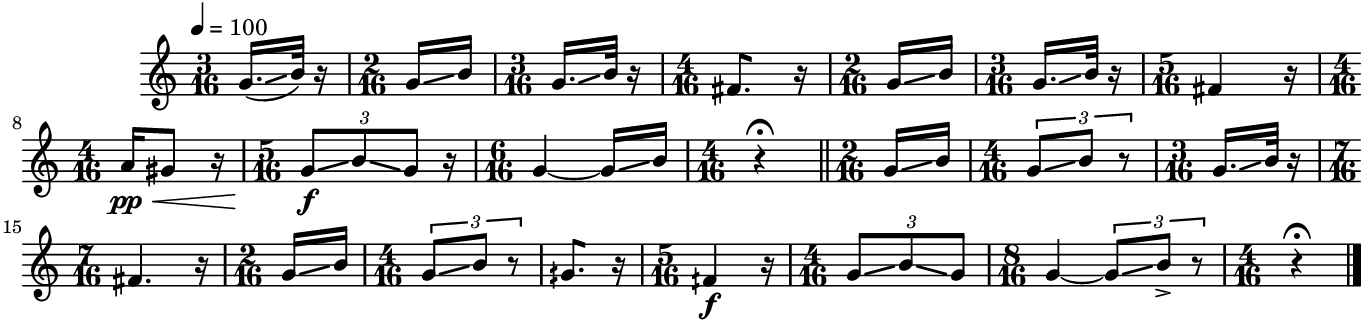

In [8]:
ch2 = ch.copy()
ch2

Chain([4G:3/8♩:gliss=True:symbols=[Slur(anchor=4G, kind=start, uuid=v9aze88x)], 4B:1/8♩:symbols=[Slur(anchor=4B, kind=end, uuid=rmdcf870)], R:1/4♩, 4G:1/4♩:gliss=True, 4B:1/4♩, 4G:3/8♩:gliss=True, 4B:1/8♩, R:1/4♩, 4F♯:3/4♩:symbols=[Articulation(tenuto)], R:1/4♩, …])
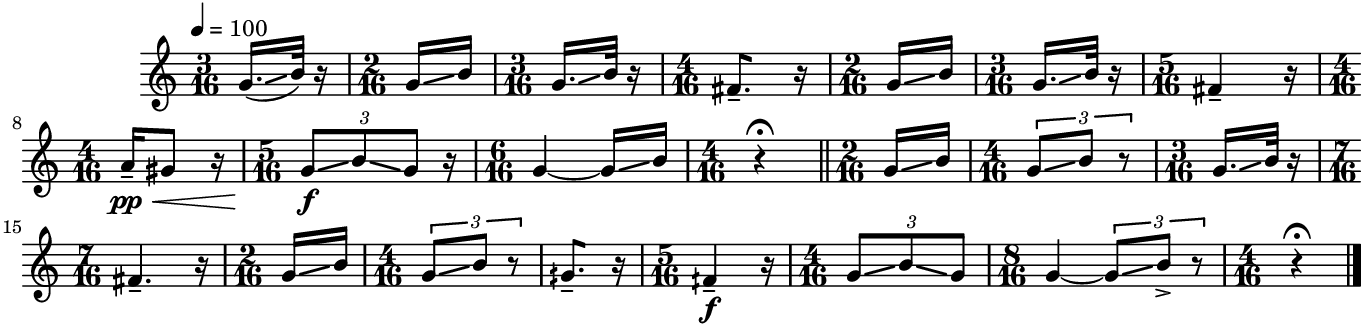

In [9]:
ch2 = ch.copy()
for i in range(struct.numMeasures()):
    events = ch2.eventsBetween((i, 0), (i+1, 0))
    if events:
        ev0 = events[0]
        if not ev0.isRest() and not (ev0.gliss or ev0.tied):
            ev0.addSymbol('tenuto')
ch2

Chain([4G:4♩, 4A:3♩, 4B:2♩, 5C:1♩, 5D:3/4♩, 5E:2/3♩])
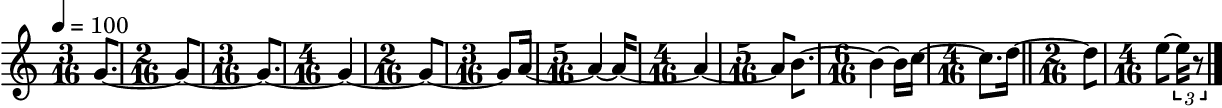

In [10]:
ch2 = Chain([
    "4G:4",
    "4A:3",
    "4B:2",
    "5C:1",
    "5D:3/4",
    "5E:2/3"
])
ch2

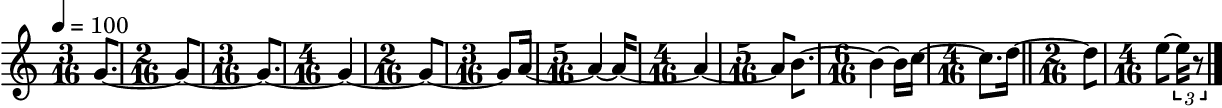

In [11]:
ch3 = ch2.copy()
ch3.splitEventsAtMeasures()
ch3.show()
ch3.dump()

Chain([4G~:3/4♩:symbols=[Articulation(accent)], 4G~:1/2♩:symbols=[Articulation(accent)], 4G~:3/4♩:symbols=[Articulation(accent)], 4G~:1♩:symbols=[Articulation(accent)], 4G~:1/2♩:symbols=[Articulation(accent)], 4G:1/2♩:symbols=[Articulation(accent)], 4A~:1/4♩, 4A~:5/4♩:symbols=[Articulation(accent)], 4A~:1♩:symbols=[Articulation(accent)], 4A:1/2♩:symbols=[Articulation(accent)], …])
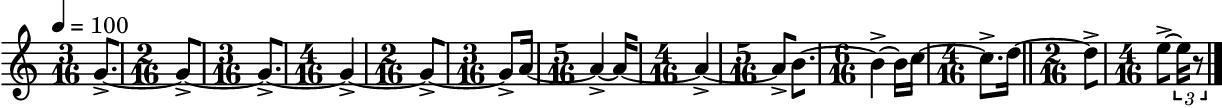

In [12]:
for i in range(struct.numMeasures()):
    #print("---------------", i)
    events = ch3.eventsBetween((i, 0), (i+1, 0))
    if events:
        ev0 = events[0]
        if not ev0.isRest():
            ev0.addSymbol('accent')
ch3